# Project: Wrangling [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Gather</a></li>
<li><a href="#assessing">Assess</a></li>
<li><a href="#cleaning">Clean</a></li>
<li><a href="#visualizing">Visualize</a></li>
</ul>

<a id='intro'></a>
# Introduction
>The dataset that we will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs). WeRateDogs is a Twitter account that rates people's dogs with a >humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because ["they're good dogs Brent."](https://knowyourmeme.com/memes/theyre-good-dogs-brent) WeRateDogs has over 4 million followers and has  received international media coverage.

<a id='gathering'></a>
# Gather
> The data has been gathered from three different sources:
>* We have downloaded the file `twitter_archive_enhanced.csv` provided by Udacity and stored its  content in the dataframe `df_twitter`. The name of the columns are self-explanatory. More info is given below.
>* We have directly downloaded the contents of the file `image_predictions.tsv` from the Internet using the url
of the file and the pythons's library `requests` . In fact, we used the function `write_file` written in python for this purpose. However, we will not run this function here and the code is geven below. This file has a prediction of the breed of the dog appeared in the photo. We stored the contents of this file in the dataframe
`df_prediction`.
>* Addiotnal data was collected via Tweeter API. The addional data consisted of `tweet_id`, `retweet_count` and
`favorite_count` and when the tweet was created. We stored all this additional data in the file `tweet_json.txt`. For this purpose we created the function `twitter_api` written in python. The code for this function was provided by Udacity. (see the code below) However, we will not run this function here. To store the contents of the file 
`tweet_json.txt` in the dataframe `df_json`, we create two functions, `read_json` and `dataframe_json` for this purpose.

In [1]:
#import all the required libraries
import numpy as np
import pandas as pd
import requests #useful for reading contents from the internet
import json#useful for reading and writing json file
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
plt.style.use("fivethirtyeight")
import seaborn as sns
%matplotlib inline



__Read the contents of the file `twitter_archive_enhanced.csv` in the dataframe `df_twitter`__.

In [2]:
df_twitter=pd.read_csv("twitter-archive-enhanced.csv")
df_twitter.head() #prints the first 5 rows of the dataframe

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


**Explanation of the columns of the above dataframe**:

The coulmns of the above dataframe are self-explanatory except probably for `tweet_id`, `expanded_urls`,
`rating_numerator`,`rating_denominator`and text.
* `tweet_id` s the last part of the tweet URL after "status/".
* `expanded_urls` is the url of the photo having the description of the photo, number of retweets and likes.
* Ratings for the photo are of the form numerator/denominator. So `rating_numerato`r=numerator of the rating
and `rating_denominator`=denominator of the rating of the photo.
* `text`is the summary of the dog (sometimes it is not a dog) in the photo having dog's name, habits and the rating of the dog is recorded at the end.


**Use the function `write_file` to store the data from the given url  in the file image_predictions.tsv. Then store the content of this file in the dataframe `df_prediction`**

In [3]:
url=" https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
def write_file(url):
    source=requests.get(url) #gets the data from url
    with open("image_prediction.tsv","wb") as file:
        file.write(source.content) #writes the content of the data retrieved from the url in the file




In [4]:
df_prediction=pd.read_csv("image_prediction.tsv",sep="\t")
df_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


__The columns `p1`,`p1_conf`,`p1_dog` require an explanation. The columns `p2`,`p2_conf`,`p2_dog` and `p3`,`p3_conf`,`p3_dog` have a similar interpretation.__
* `p1` is the algorithm's #1 prediction for the image in the tweet. 
* `p1_conf` is how confident the algorithm is in its #1 prediction.
* `p1_dog` is whether or not the #1 prediction is a breed of dog.
* `jpg_url` is the url where a photo depicting a dog only is stored.

__The code used to create the file `tweet_json.txt` containing further information about the tweets is given below.__

In [5]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'
def twitter_api(consumer_key,consumer_secret,accss_token,access_secret):
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)

    api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_twitter is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
    tweet_ids = df_twitter.tweet_id.values
    len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
    count = 0
    fails_dict = {}
    start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
    with open('tweet_json.txt', 'w') as outfile:
        # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)

__Store the content of the file `tweet_json.txt` in the data frame `df_json` with the aid of two functions,
`read_json` and `dataframe_json`__


In [6]:
file="tweet_json.txt"
import json
def read_json(file):
    data=[]
    with open(file) as json_file:
        for line in json_file:#reads line by line from the file
            data.append(line) #appends each line in the list called data
    return data #returns the list where each line has a json format, i.e. each line is a dictionary

In [7]:
def dataframe_json(file):
    data=read_json(file)
    length=len(data)
    json_data=[{"id":json.loads(data[k])["id"],"retweet_count":json.loads(data[k])["retweet_count"],
                "favorite_count":json.loads(data[k])["favorite_count"],
               "created_at":json.loads(data[k])["created_at"]} for k in range(length)] #json.loads(data[k])
    #reads a dictionary stores in the kth position in the list data and then we access the keys of the dictionary
    #through json.loads(data[k])[key]. We chose the following keys: "id","retweet_count","likes" and "creation day"
    df_json=pd.DataFrame(json_data) #creates a dataframe row by row
    return df_json

In [8]:
df_json=dataframe_json(file)

In [9]:
df_json.head()

,id,retweet_count,favorite_count,created_at
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017


<a id='assessing'></a>
# Assess
> During the assessment process the following issues were established. The code for finding out these issues 
> is given in the cells below.
> The issues are:

> __Quality__

> Quality issues for the  df_twitter table:
> * Ratings (some rows have two ratings and not all the ratings have same denominator)
>* Remove retweets to get the original ratings
>* Names (some dogs are named by the character 'a' or have the 'None' value or some names start with lowercase letters)
>* Some dog stages were not identified correctly and some photos have two dog stages
>* Missing values (some columns present misssing values)
>* None is a missing value but it is not recognized by pandas
>* `tweet_id`'s dtype is int
>* `Timestamp` is string
>* The column `source`has tags in it

>Quality issues for the df_prediction table
>* this table does not have predictions for all the photos in the df_twitter table (We cannot make predictions for the remaining pictures as we did not have the algorithm which made the original predictions at our disposal )
>* `tweet_id`'s dtype is int
>* Three different algorithms provided for predicting the image in `df_twitter`

>Quality issies for the table df_json
>* The dtype of the columns `created at` is string 


> __Tidiness__
>* The variable dog stages is presented in 4 columns
>* The variable rating is presented in two columns
>* The df_json table should be part of the table `df_twitter`
>* The column `created_at` is duplicated with `timestamp`



__Let's spot the quality issues for the table `df_twitter`__
>* Some photos have two ratings.

In [10]:
mask=df_twitter.rating_denominator==20
df_twitter[mask]["text"].iloc[0]#some photos were given two raitngs

'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a'

It is useful to observe that, althought the max value that a denominator can have is 170, 99% of denominators are $\leq 10$. Analogous conclusions can be drawn for the numerators.  This fact is shown below.


In [11]:
df_twitter.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [12]:
np.percentile(df_twitter.rating_denominator,q=0.99) #prints 99% percentile of denominators

10.0

In [13]:
df_twitter.rating_numerator.describe() #the max  value for numerator is 1776 but 99% are <=3

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [14]:
np.percentile(df_twitter.rating_numerator,q=0.99)

3.0

>* Below you can find a code which spots those picture that were given multiple ratings.

In [15]:
#finds the number of pictures with multiple ratings (possible cases one, two or three ratings in one picture)
df_twitter["text"].str.findall(r"(\d{1,4}/\d{1,4})+").str.len().value_counts()

1    2323
2      32
3       1
Name: text, dtype: int64

In [16]:
mask=df_twitter["text"].str.contains(r"\d{1,4}/\d{1,4}.+\d{1,4}/\d{1,4}")
df_twitter[mask].text.iloc[1] #although two ratings appear in the picture one is meant to be given

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [17]:
mask=df_twitter["text"].str.contains(r"\d{1,4}/\d{1,4}.+\d{1,4}/\d{1,4}.+\d{1,4}/\d{1,4}")
df_twitter[mask]["text"]#prints the picture with three rating

2010    10/10 for dog. 7/10 for cat. 12/10 for human. ...
Name: text, dtype: object

>* Some dogs are named by the character 'a' which can considered as a missing value. In fact 55 dogs were named by the character 'a'.


In [18]:
df_twitter["name"].value_counts() #some dogs named with 'a' or 'None'

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
          ... 
Orion        1
Beemo        1
Daniel       1
Sora         1
Timber       1
Name: name, Length: 957, dtype: int64

In [19]:
mask=df_twitter["name"].str.islower()
df_twitter.loc[mask,"name"].value_counts()#some dogs named wit lowecase letters. Later they will get nan values

a               55
the              8
an               7
very             5
just             4
one              4
quite            4
getting          2
not              2
mad              2
actually         2
light            1
his              1
unacceptable     1
officially       1
infuriating      1
my               1
incredibly       1
such             1
old              1
this             1
all              1
by               1
life             1
space            1
Name: name, dtype: int64

>* Some dog stages were not identified correclty. For exasmple some __None__ values in the column "doggo" should be "doggo", some __None__ values in the column `pupper` should be pupper and some __None__ values in the column `puppo` should be puppo as it is indicated in the corresponding `text` column. Some photos have two dog stages, for example doggo and puppo. The explantion of these statements is given by the code below.

In [20]:
mask=df_twitter["doggo"]=="None" #selects those rows where the dog stage value is None
mask1=df_twitter[mask]["text"].str.contains("doggo")#The corresponding text shows that the dog should be doggo
sum(mask1)#There are 10 instances where the dog stage was identified as None while they are doggo


10

In [21]:
mask=df_twitter["pupper"]=="None" #selects those rows where the dog stage value is None in the "pupper" col
mask1=df_twitter[mask]["text"].str.contains("pupper")#The corresponding text shows that the dog should be pupper
sum(mask1)#There are 24 instances where the dog stage was identified as None while they are pupper



24

In [22]:
mask=df_twitter["puppo"]=="None" #selects those rows where the dog stage value is None in the "puppo" col
mask1=df_twitter[mask]["text"].str.contains("puppo")#The corresponding text shows that the dog should be puppo
sum(mask1)#There are 8 instances where the dog stage was identified as None while they are puppo



8

In [23]:
mask=(df_twitter["text"].str.contains("doggo"))&(df_twitter["text"].str.contains("puppo"))
sum(mask)#some photos have two dog stages, for example doggo and puppo (there two instances of this case)
print(df_twitter[mask]["text"].iloc[0])
print()
print(df_twitter[mask]["text"].iloc[1])



I have stumbled puppon a doggo painting party. They're looking to be the next Pupcasso or Puppollock. All 13/10 would put it on the fridge https://t.co/cUeDMlHJbq

Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel


>* Some columns have missing values

In [24]:
df_twitter.isna().sum() #counts the number of missing data in each column

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

>* __None__ in the dog stages is not recognized as a missign value by pandas as it is indicacted by the above table__
>* Some dogs are named by the character 'a' which can be considered as a missing value
>* Tweet_id's dtype is int
>* Timestamp is a string

In [25]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [26]:
type(df_twitter["timestamp"].iloc[0]) #timestamp is of string type

str

>* The column `source` has tags <a> in it

In [27]:
df_twitter["source"].iloc[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

>The table df_prediction does not have the predictions for all the photos in the df_twitter table. This can be established by looking at the dimensions of the tables (dataframes)

In [28]:
print("The dimension of the df_twitter is ", df_twitter.shape)
print("The dimension of the df_prediction is ", df_prediction.shape)


The dimension of the df_twitter is  (2356, 17)
The dimension of the df_prediction is  (2075, 12)


<a id='cleaning'></a>
# Clean

In [29]:
#Copy all the dataframes
df_twitter_clean=df_twitter.copy()
df_prediction_clean=df_prediction.copy()
df_json_clean=df_json.copy()

 We will deal with missing values related to dog names, dog stages

__Define__

For dog names do the following:
>* Change the names of the dogs that were given the name 'a' using the column `text` and regular expressions


__Code__

In [30]:
indices=df_twitter_clean["name"].str.islower()#gives me the indices where the names start with lowercase letters
#this variable will be useful later

In [31]:
mask=df_twitter_clean["name"]=="a"#dogs given the name 'a'
new_names=df_twitter_clean.loc[mask,"text"].str.findall(r"named\s+\w+|name is\s+\w+|[Tt]his is\s+[A-Z]+\w+").str[0].str.split(" ").str[-1]
df_twitter_clean.loc[mask,"name"]=new_names #replace the name 'a' with corresponding name from the text

__Test__

In [32]:
(df_twitter_clean["name"]=="a").sum() # zero dogs named 'a'as expected. Note that  there stril nan value in that 
#column which can be the result of the fact there is no name for the corresponding picture or we did not find
#all the possible patterns to extract the names from the column 'text'

0

__Define__
>* Change the names of the dogs that were given the name 'None' using the column `text` and regular expressions

__Code__

In [33]:
mask=df_twitter_clean["name"]=="None" #dogs given the name "None"
new_names=df_twitter_clean.loc[mask,"text"].str.findall(r"named\s+\w+|name is\s+\w+|[Tt]his is\s+[A-Z]+\w+").str[0].str.split(" ").str[-1]
df_twitter_clean.loc[mask,"name"]=new_names


__Test__

In [34]:
(df_twitter_clean["name"]=="None").sum() # it is zero as expected

0

__Define__

>* Replace the names starting with lowercase lettters (in fact they are not real dog names) with nan values

__Code__

In [35]:
df_twitter_clean.loc[indices,"name"]=np.nan

__Test__

In [36]:
(df_twitter_clean["name"].str.islower()).sum() #zero as expected


0

For dog stages do tthe following:
>* Replace the values "None" in the doggo column with "doggo" for the right set of indices


__Code__

In [37]:
mask=df_twitter_clean["doggo"]=="None" #selects those rows where the dog stage value is None
mask1=df_twitter_clean[mask]["text"].str.contains("doggo")
indices=df_twitter_clean[mask].loc[mask1,"doggo"].index.tolist()#take those indices where the "None" value
#should be replacced with 'doggo'
df_twitter_clean.doggo.loc[indices]="doggo"#replace the "None" with "doggo"

/Users/dimitrioskarslidis/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


__Test__

In [38]:
df_twitter_clean.doggo.loc[indices]

83      doggo
268     doggo
302     doggo
475     doggo
477     doggo
798     doggo
934     doggo
946     doggo
987     doggo
1120    doggo
Name: doggo, dtype: object

>* Replace the values "None" in the pupper column with "pupper" for the right set of indices

__Code__

In [39]:
mask=df_twitter_clean["pupper"]=="None" #selects those rows where the dog stage value is None
mask1=df_twitter_clean[mask]["text"].str.contains("pupper")
indices=df_twitter_clean[mask].loc[mask1,"pupper"].index.tolist()#take those indices where the "None" value
#should be replacced with 'puppero'
df_twitter_clean.pupper.loc[indices]="pupper"#replace the "None" with "pupper"

__Test__

In [40]:
df_twitter_clean.pupper.loc[indices]

54      pupper
993     pupper
1027    pupper
1093    pupper
1220    pupper
1228    pupper
1254    pupper
1265    pupper
1351    pupper
1516    pupper
1634    pupper
1635    pupper
1636    pupper
1643    pupper
1710    pupper
1712    pupper
1743    pupper
1826    pupper
1843    pupper
1847    pupper
1862    pupper
1900    pupper
1928    pupper
2141    pupper
Name: pupper, dtype: object

__Define__

>* Replace Replace the values "None" in the puppo column with "puppo" for the right set of indices

__Code__

In [41]:
mask=df_twitter_clean["puppo"]=="None" #selects those rows where the dog stage value is None in the puppo col
mask1=df_twitter_clean[mask]["text"].str.contains("puppo")
indices=df_twitter_clean[mask].loc[mask1,"puppo"].index.tolist()#take those indices where the "None" value
#should be replacced with 'puppo'
df_twitter_clean.puppo.loc[indices]="puppo"#replace the "None" with "puppo"

__Test__

In [42]:
df_twitter_clean.puppo.loc[indices]

85     puppo
106    puppo
134    puppo
172    puppo
228    puppo
274    puppo
296    puppo
545    puppo
Name: puppo, dtype: object

__Define__

>* Extract the ratings from the text by first removing retweets from df_twitter_clean table. In case of multiple ratings choose the last one.

__Code__

In [43]:
cols=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']
for col in cols:
    df_twitter_clean=df_twitter_clean[df_twitter_clean[col].isnull()]



In [44]:
#create a function, called get_score, which in case of multiple ratings gets the last rating
def get_score(x):
    if len(x)>1:
        return x[-1]
    elif len(x)==1:
        return x[0]
    else:
        return np.nan
numerator=df_twitter_clean["text"].str.findall(r"(\d{1,4}/\d{1,4})+").apply(get_score).str.split("/").str[0].str.rstrip(",/.s)!").astype(int)
#extracts the numerator. Also we took care of characters that appears right after the numor or denom with rstrip()
denominator=df_twitter_clean["text"].str.findall(r"(\d{1,4}/\d{1,4})+").apply(get_score).str.split("/").str[1].str.rstrip(",/.s)!").astype(int)
#extracts the denominator. Also we took care of characters that appears right after the numor or denom with rstrip()
df_twitter_clean["rating"]=numerator/denominator
 #\d{1,4}/\d{1,4}.|\d{1,4}/\d{1,4}   

In [45]:
#Drop the columns rating_numerator, rating_denominator
df_twitter_clean.drop(columns=["rating_denominator","rating_numerator"],inplace=True)#drop rating_denominator,
#rating_numerator

__Test__

In [46]:
df_twitter_clean[cols].notnull().sum()#retweets has been removes

retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
dtype: int64

In [47]:
df_twitter_clean["rating"]#prints the rating

0       1.3
1       1.3
2       1.2
3       1.3
4       1.2
       ... 
2351    0.5
2352    0.6
2353    0.9
2354    0.7
2355    0.8
Name: rating, Length: 2175, dtype: float64

__Tidiness__

__Define__
>* Create a column called dog stage

__Code__

In [48]:
#replace None with ''
dog_stages=["doggo","floofer","pupper","puppo"]
for stage in dog_stages:
    df_twitter_clean[stage].replace("None","",inplace=True)

In [49]:
#define a new column dog_stage
df_twitter_clean["dog_stage"]=df_twitter_clean.doggo+df_twitter_clean.floofer+df_twitter_clean.pupper+\
df_twitter_clean.puppo


In [50]:
df_twitter_clean["dog_stage"].value_counts()

                1792
pupper           248
doggo             82
puppo             31
doggopupper       10
floofer            9
doggopuppo         2
doggofloofer       1
Name: dog_stage, dtype: int64

In [51]:
#Those one with multiple dog stages shoud be separeated with commas and "" should be changed with np.nan
df_twitter_clean.loc[df_twitter_clean["dog_stage"]=="doggopuppo","dog_stage"]='doggo, puppo'
df_twitter_clean.loc[df_twitter_clean["dog_stage"]=="doggopupper","dog_stage"]='doggo, pupper'
df_twitter_clean.loc[df_twitter_clean["dog_stage"]=="doggofloofer","dog_stage"]='doggo, floofer'
df_twitter_clean.loc[df_twitter_clean["dog_stage"]=="","dog_stage"]=np.nan

In [52]:
#drop the columns "doggo","puppo", "floofer","pupper"
df_twitter_clean.drop(columns=["doggo","puppo","floofer","pupper"],inplace=True)

__Test__

In [53]:
df_twitter_clean["dog_stage"].value_counts()

pupper            248
doggo              82
puppo              31
doggo, pupper      10
floofer             9
doggo, puppo        2
doggo, floofer      1
Name: dog_stage, dtype: int64

__Define__
>* Merge df_json_clean and df_twitter_clean on "tweet_id
>* Drop the column `id`
>* Drop the column `created_at` since it is duplicated with `timestamp`

__Code__

In [54]:
df_twitter_merged_clean=df_twitter_clean.merge(df_json_clean,how="inner",left_on="tweet_id",right_on="id")

In [55]:
#drop columns such as "id" and "created_at" (it is duplicated with timestamp)
df_twitter_merged_clean.drop(columns=["id","created_at"],inplace=True)


__Quality__


__Define__
>* Remove tags from the columns `source`
>* Change `tweet_id` dtype to sring in `df_twitter_merged_clean` and `df_prediction_clean`
>* Change `timestamp` to datetime
>* Drop columns `in_reply_to_status_id`, `in_reply_to_user_id`,`retweeted_status_id`, `retweeted_status_user_id`,`retweeted_status_timestamp` (more than 97 % of the elements in these columne are missing and wewill not need them for our futre analysis)


__Code__

In [56]:
# Remove tags
df_twitter_merged_clean["source"]=df_twitter_merged_clean["source"].str.findall(r"[^<a></a>]").str.join('')

In [57]:
#Change the dtypes of tweet_id and timestamp
df_twitter_merged_clean["tweet_id"]=df_twitter_merged_clean["tweet_id"].astype(str)
df_prediction_clean["tweet_id"]=df_prediction_clean["tweet_id"].astype(str)
df_twitter_merged_clean["timestamp"]=pd.to_datetime(df_twitter_merged_clean["timestamp"])

In [58]:
df_twitter_merged_clean.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp'],inplace=True)

__Test__

In [59]:
df_twitter_merged_clean["source"] #no tags

0        href="http:twitter.comdownlodiphone" rel="nof...
1        href="http:twitter.comdownlodiphone" rel="nof...
2        href="http:twitter.comdownlodiphone" rel="nof...
3        href="http:twitter.comdownlodiphone" rel="nof...
4        href="http:twitter.comdownlodiphone" rel="nof...
                              ...                        
2170     href="http:twitter.comdownlodiphone" rel="nof...
2171     href="http:twitter.comdownlodiphone" rel="nof...
2172     href="http:twitter.comdownlodiphone" rel="nof...
2173     href="http:twitter.comdownlodiphone" rel="nof...
2174     href="http:twitter.comdownlodiphone" rel="nof...
Name: source, Length: 2175, dtype: object

In [60]:
df_twitter_merged_clean.info()#the dtypes have been changed acccordingly

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2175 non-null   object             
 1   timestamp       2175 non-null   datetime64[ns, UTC]
 2   source          2175 non-null   object             
 3   text            2175 non-null   object             
 4   expanded_urls   2117 non-null   object             
 5   name            1403 non-null   object             
 6   rating          2175 non-null   float64            
 7   dog_stage       383 non-null    object             
 8   retweet_count   2175 non-null   int64              
 9   favorite_count  2175 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(6)
memory usage: 186.9+ KB


__Define__
>* For each row in the `df_prediction_clean` table keep only the algorithm with the maximum prediction (and its conclusions) and 
drop the columns that correspond to the other algorithms. In fact, create a dataframe, called `df_max` which in each row will contain the algorithm with maximum confidence,the breed and the image prediction that corresponds to that algorithm.
>* Drop the colummns `p1`,`p1_conf`,`p1_dog`,`p2`,`p2_conf`,`p2_dog`,`p3`,`p3_conf` and`p3_dog` from df_prediction_clean
>* Merge `df_max` with `df_prediction_clean` and call the resulting dataframe by `df_prediction_clean` again

__Code__

In [61]:
#This list conatians the algorithms with the naximum prediction
max_conf=df_prediction_clean[["p1_conf","p2_conf","p3_conf"]].apply(lambda x: np.argmax(x),axis=1).map({0:"p1",1:"p2",2:"p3"})

In [62]:
#This list contains the rows of df_max (will be created in the next cell) where each row has the maximum confidence
# algorithm and the breed and image prediction corresponding to that algorithm
max_list=[{"max_conf":df_prediction_clean.loc[ind,element+"_conf"],"image_pred":df_prediction_clean.loc[ind,element],
           "is_dog":df_prediction_clean.loc[ind,element+"_dog"]}
          for (ind,element) in enumerate(max_conf)]

In [63]:
df_max=pd.DataFrame(max_list) #Note: after I wrote teh above code I realized that p1 has the max prediction for 
#each image
df_max.head()

,max_conf,image_pred,is_dog
0,0.465074,Welsh_springer_spaniel,True
1,0.506826,redbone,True
2,0.596461,German_shepherd,True
3,0.408143,Rhodesian_ridgeback,True
4,0.560311,miniature_pinscher,True


In [64]:
df_prediction_clean.drop(columns=["p1","p1_conf","p1_dog","p2","p2_conf","p2_dog","p3","p3_conf","p3_dog"],
                         inplace=True) #Drop the columns

In [65]:
df_prediction_clean=pd.concat([df_prediction_clean,df_max],axis=1)

__Test__

In [66]:
df_prediction_clean.head()

,tweet_id,jpg_url,img_num,max_conf,image_pred,is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,0.465074,Welsh_springer_spaniel,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,0.506826,redbone,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,0.596461,German_shepherd,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,0.408143,Rhodesian_ridgeback,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,0.560311,miniature_pinscher,True


__Create a master dtaframe and call it by `df_master`__ and save the contents of the `df_master` in the file
`twitter_archive_master.csv`

In [67]:
df_master=df_twitter_merged_clean.merge(df_prediction_clean,how="inner",on=["tweet_id"])

In [68]:
df_master.head()#prints the first 5 rows

,tweet_id,timestamp,source,text,expanded_urls,name,rating,dog_stage,retweet_count,favorite_count,jpg_url,img_num,max_conf,image_pred,is_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"href=""http:twitter.comdownlodiphone"" rel=""nof...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,NaN,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,0.097049,orange,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"href=""http:twitter.comdownlodiphone"" rel=""nof...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,NaN,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,0.323581,Chihuahua,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"href=""http:twitter.comdownlodiphone"" rel=""nof...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,NaN,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,0.716012,Chihuahua,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"href=""http:twitter.comdownlodiphone"" rel=""nof...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,NaN,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,0.170278,paper_towel,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"href=""http:twitter.comdownlodiphone"" rel=""nof...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,NaN,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,0.555712,basset,True


In [69]:
df_master.to_csv("twitter-archive-master.csv",index=False)

__Create the database called `dogs.db` and then store `df_master` in the table `master`. Since this table already exists in my jupyter dashboard I'll comment the code below.__ 

In [70]:
engine = create_engine('sqlite:///dogs.db')#creates an empty database dogs.db
#df_master.to_sql('master', engine, index=False)# Store cleaned master DataFrame ('df_master') 
#in a table called master in dogs.db

<a id='visualizing'></a>
# Visualize
## Q 1. What are top 5  most  popular names of objects appearing in the images?
## Q 2. What are the top 5  most popular dog names ?
## Q 3. What are the top 5 names(or top 5 dog stages) based on the average of ratings of images or on the average number  of 'likes'?
## Q 4. Are the ratings, 'likes', number of retweets correlated to each other?



>* What are the top 5 most popular names of objects appearing in the images?

In [71]:
query='''select  name, count(1) as freq_names from master where name is not null group by name 
order by count(1) desc'''
df_name=pd.read_sql(query,engine)
df_name.head() # as we can see below Charlie is the most popular name

,name,freq_names
0,Charlie,11
1,Oliver,10
2,Lucy,10
3,Cooper,10
4,Tucker,9


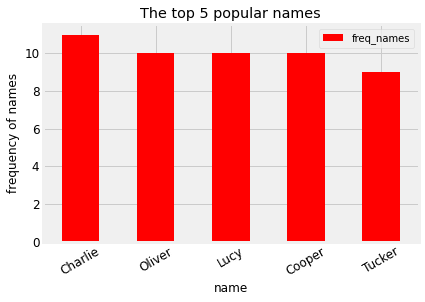

In [72]:
#visualize the above dataframe
df_name.head().plot(kind="bar",x="name",y="freq_names",rot=30,color="r",ylabel="frequency of names",fontsize=12)
plt.title("The top 5 popular names")
plt.savefig("top_5_names.png")

In [73]:
df_master[df_master["name"]=="Charlie"]["jpg_url"] #prints the images corresponding to the name Charlie

195     https://pbs.twimg.com/media/C7iNfq1W0AAcbsR.jpg
200     https://pbs.twimg.com/media/C7JkO0rX0AErh7X.jpg
244     https://pbs.twimg.com/media/C5JYaYoVYAAcEQw.jpg
252     https://pbs.twimg.com/media/C40r_GDWAAA5vNJ.jpg
287     https://pbs.twimg.com/media/C3rN-lcWEAA9CmR.jpg
592     https://pbs.twimg.com/media/CrOBSfgXgAABsTE.jpg
688     https://pbs.twimg.com/media/CnbJuPoXEAAjcVF.jpg
1061    https://pbs.twimg.com/media/CcLq7ipW4AArSGZ.jpg
1133    https://pbs.twimg.com/media/Ca0lzzmWwAA5u56.jpg
1346    https://pbs.twimg.com/media/CXaQqGbWMAAKEgN.jpg
1693    https://pbs.twimg.com/media/CVGp4LKWoAAoD03.jpg
Name: jpg_url, dtype: object

>__By clicking the above links we can see that all the images with the name Charlie depict dog(s) except for the image 9 which 
depicts a dog and horses.__
<img src="https://pbs.twimg.com/media/Ca0lzzmWwAA5u56.jpg" alt="horse and dog" width="250" height="300"/>

>* What are the top 5 most popular dog names? Here we will use the column `is_dog`, the prediction made by neural network algorithm whether a dog is depicted in the image or not


In [74]:
query='''select name, count(1) as freq from master where is_dog=True and name is not null 
group by name order by 2 desc limit 5'''
df_dogname=pd.read_sql(query,engine)

In [75]:
df_dogname

,name,freq
0,Cooper,10
1,Charlie,10
2,Oliver,9
3,Tucker,8
4,Lucy,8


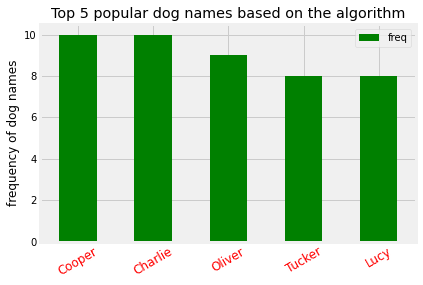

In [76]:
df_dogname.plot(kind="bar",color="green")
plt.ylabel("frequency of dog names",fontsize=12)
plt.xticks([0,1,2,3,4],df_dogname["name"].tolist(),rotation=30,fontsize=12,color="r");
plt.title("Top 5 popular dog names based on the algorithm");
plt.savefig("top_dog_names.png")

Looking at the above barplot we can see that Charlie is not anymore the most popular dog name (frequency 10) since Cooper has frequency 10 as well. I suspect that the algorithm does not recognize that that the above image besides horses has a dog as well. Below I give the code to see if my intuition is correct.

In [77]:
df_master.query('name=="Charlie"')[["is_dog","jpg_url"]]

,is_dog,jpg_url
195,False,https://pbs.twimg.com/media/C7iNfq1W0AAcbsR.jpg
200,True,https://pbs.twimg.com/media/C7JkO0rX0AErh7X.jpg
244,True,https://pbs.twimg.com/media/C5JYaYoVYAAcEQw.jpg
252,True,https://pbs.twimg.com/media/C40r_GDWAAA5vNJ.jpg
287,True,https://pbs.twimg.com/media/C3rN-lcWEAA9CmR.jpg
592,True,https://pbs.twimg.com/media/CrOBSfgXgAABsTE.jpg
688,True,https://pbs.twimg.com/media/CnbJuPoXEAAjcVF.jpg
1061,True,https://pbs.twimg.com/media/CcLq7ipW4AArSGZ.jpg
1133,True,https://pbs.twimg.com/media/Ca0lzzmWwAA5u56.jpg
1346,True,https://pbs.twimg.com/media/CXaQqGbWMAAKEgN.jpg


Surprisingly the image with horses and the dog is recognized correclty. What is not recognized correctly 
is the following image

<img src="https://pbs.twimg.com/media/C7iNfq1W0AAcbsR.jpg" alt="dog" width="250" height="300"/>


>* What are the top 5 names based on the average of ratings of images (same based on the average number of 'likes')?

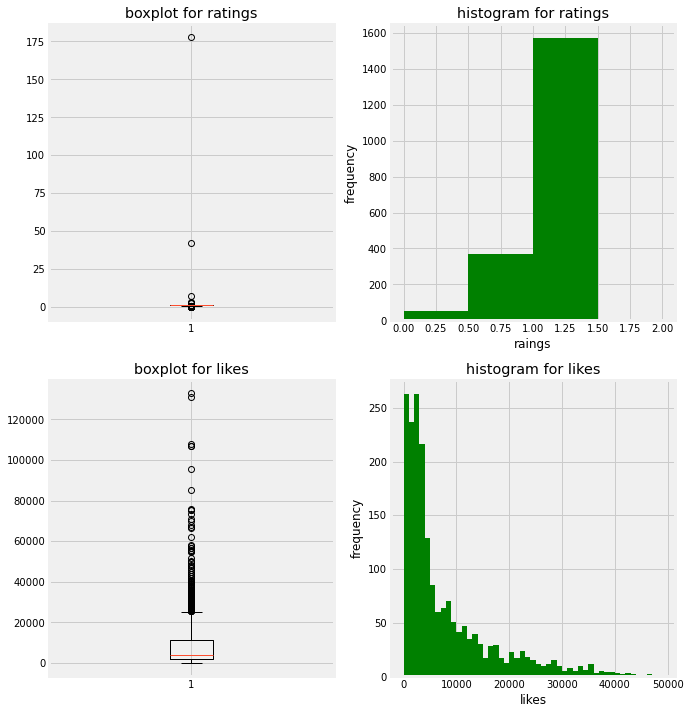

In [78]:
#Befor we answer this question let's take a look at the distribution of ratings and likes
fig,ax=plt.subplots(2,2,figsize=(10,12))
ax[0,0].boxplot(df_master["rating"])
ax[0,0].set(title="boxplot for ratings")
ax[0,1].hist(df_master["rating"],bins=[0,0.5,1,1.5,2],color="g")
ax[0,1].set(title="histogram for ratings",xlabel="raings",ylabel='frequency')
ax[1,0].boxplot(df_master["favorite_count"])
ax[1,0].set(title="boxplot for likes")
ax[1,1].hist(df_master["favorite_count"],bins=[k for k in range(0,50000,1000)],color="green",
             histtype="bar")
ax[1,1].set(title="histogram for likes",xlabel="likes",ylabel='frequency');

>  As we can see both `rating` and `favorite_count` are skewed. As a result, we need to remove the outliers from these features ohtervise the corresponding averages will be inflated or deflated. The code below (function named `top_names`) show the top 5 names with the highest average ratings/likes.

In [79]:
#Anything outside of [Q1-1.5*(Q3-Q1),Q3+1.5(Q3-Q1)] will be considered an outlier
def top_names(names=5,col="rating",is_dog=False):
    q1=df_master[col].describe()["25%"]
    q3=df_master[col].describe()["75%"]
    R=q3-q1 # need this to remove outliers
    if not is_dog:
        query=f'''select name, avg({col}) as {col}_average from master 
        where ({col}>={q1-1.5*R} and {col}<={q3+1.5*(R)})and (name is not null)group by name order by 2 desc '''
        df=pd.read_sql(query,engine)
        return df.head(names)
    else:
        query=f'''select name, avg({col}) as {col}_average from master 
        where ({col}>={q1-1.5*R} and {col}<={q3+1.5*(R)})and (name is not null) and (is_dog=True)group by name order by 2 desc '''
        df=pd.read_sql(query,engine)
        return df.head(names)


In [80]:
print("The top 5 names with the highest average ratings are ")    
top_names(5)#prints the top 5 names

The top 5 names with the highest average ratings are 


,name,rating_average
0,Sundance,1.4
1,Smiley,1.4
2,Laika,1.4
3,Kuyu,1.4
4,Iggy,1.4


In [81]:
print("The top 5 dog names with the highest average number of likes are ")
top_names(5,is_dog=True) #prints the top 5 dog names based always on the algorithm (neural network)

The top 5 dog names with the highest average number of likes are 


,name,rating_average
0,Sundance,1.4
1,Smiley,1.4
2,Ollie,1.4
3,Kuyu,1.4
4,Emmy,1.4


In [82]:
#Let's look at the top 5 names whose images received the highest averages number of likes
top_names(col="favorite_count")

,name,favorite_count_average
0,Georgie,25296.0
1,Dawn,24926.0
2,Rey,24773.0
3,Kevin,24765.0
4,Wafer,24597.0


> To extract the top 5 dog stages beased on the average number of ratings or 'likes' we will use teh function
`top_dog_stages` (the code is given below)

In [83]:
def top_dog_stages(names=5,col="rating"):
    q1=df_master[col].describe()["25%"]
    q3=df_master[col].describe()["75%"]
    R=q3-q1 # need this to remove outliers
    query=f'''select dog_stage, avg({col}) as {col}_average from master 
    where ({col}>={q1-1.5*R} and {col}<={q3+1.5*(R)})and (dog_stage is not null)group by dog_stage order by 2 desc '''
    df=pd.read_sql(query,engine)
    return df.head(names)

In [84]:
#The top 5 dog stages based on the average number of ratings 
top_dog_stages(col="rating") #On average the dog stage doggo, puppo had higher rating score than 'puppo'

,dog_stage,rating_average
0,"doggo, puppo",1.300000
1,puppo,1.211111
2,floofer,1.200000
3,doggo,1.180882
4,"doggo, pupper",1.175000


In [85]:
#top 5 dog stages based on the average number of likes
top_dog_stages(col="favorite_count") #doggo, floofer had the highest numebr of likes on average

,dog_stage,favorite_count_average
0,"doggo, floofer",17169.000000
1,"doggo, puppo",16304.000000
2,puppo,12463.952381
3,doggo,10634.732143
4,floofer,9849.500000


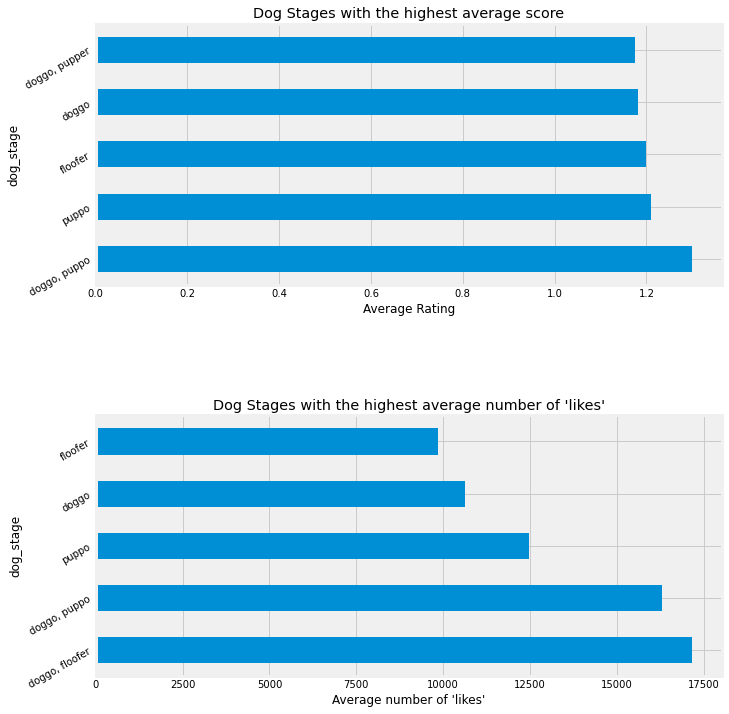

In [86]:
#The results from the two tables are visualized below
fig,ax=plt.subplots(2,1,figsize=(10,12))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
top_dog_stages().plot(kind="barh",x="dog_stage",y="rating_average",title="Dog Stages with the highest average score",
                      rot=30,legend=False,ax=ax[0])
ax[0].set(xlabel="Average Rating")
top_dog_stages(col="favorite_count").plot(kind="barh",x="dog_stage",y="favorite_count_average",rot=30,
                                          title="Dog Stages with the highest average number of 'likes'",legend=False,
                                         ax=ax[1])

ax[1].set(xlabel="Average number of 'likes'")
plt.savefig("dog_stages.png")

>* Are the ratings, 'likes', number of retweets correlated to each other?
To answer this question the correaltion matrix is very useful here. i'd expect that the number of retweets and the number 'likes' would be correlated and the ratings with the number of 'likes'

<Figure size 720x720 with 0 Axes>

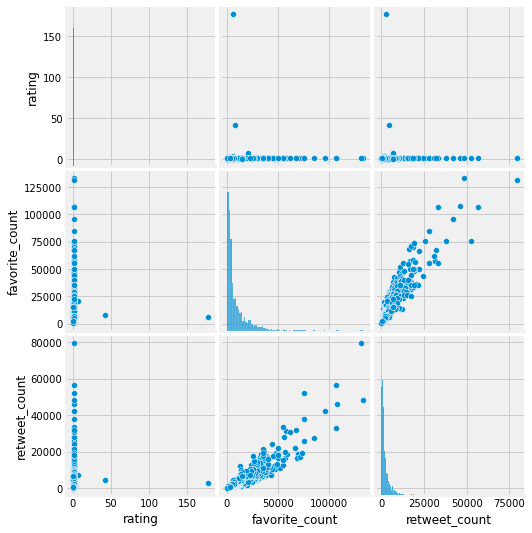

In [87]:
#let's first view the relationships between these variables graphically
plt.figure(figsize=(10,10))
corr_matrix=sns.pairplot(df_master,vars=["rating","favorite_count","retweet_count"]); #correlation between retweets and 
#number of likes is obvious
corr_matrix

In [88]:
print("The Correlation Matrix is:")
correlation=df_master[["retweet_count","favorite_count","rating"]].corr(method="pearson")
correlation #prints the correlation between variables



The Correlation Matrix is:


,retweet_count,favorite_count,rating
retweet_count,1.000000,0.912947,0.018726
favorite_count,0.912947,1.000000,0.016166
rating,0.018726,0.016166,1.000000


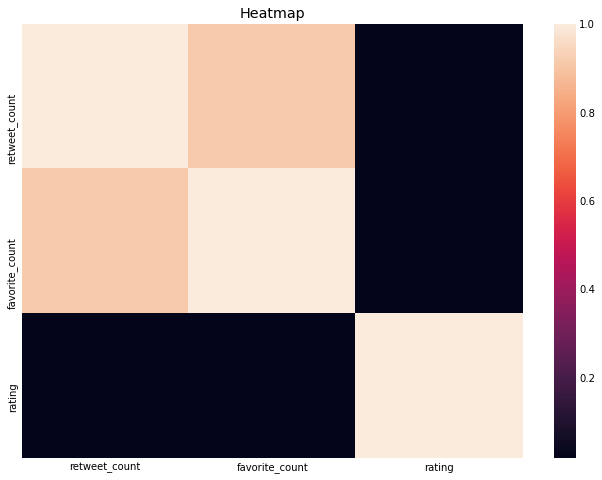

In [89]:
plt.figure(figsize=(10,8))#Visualize the corrrelation matrix via heatmap
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns)#prints the heatmap 
#of the correlation
plt.title("Heatmap");

>As we can see from the correlation matrix that the number of retweets and the number of 'likes' are correlated
(approximately 0.91). However the number of 'likes' and ratings are not strongly correlated, i.e, there is a weak linear relationship between these two features. This does not imply that these two features are not related. For example there might be a quadratic relationship between these two features) or indeed these two features are not related at all

>In question 3 we saw that average rating for the dog stage `doggo, poppo` was larger than for the dog stage `puppo`. We want to see if there is a statistical significamce between the averages of these dog stages, i.e., we want to check $$H_{o}: \mu_{dp}\leq \mu_{puppo}\hspace{0.5cm} H_{1}:\mu_{dp}> \mu_{puppo} $$

In [90]:
np.random.seed(42)
mask=df_master["dog_stage"].notnull()
dog_sample=df_master[mask][["dog_stage","rating","favorite_count"]].sample(200)
doggo_puppo=[]
puppo=[]
diff_mean=[]
B=10000
for _ in range(B):
    bootstrap=dog_sample.sample(200,replace=True)#samples with replacement
    dp=bootstrap[bootstrap.dog_stage=="doggo, puppo"]["rating"].mean()#computes rating mean for "doggo, puppo"
    p=bootstrap[bootstrap.dog_stage=="puppo"]["rating"].mean()#computes rating mean for "puppo"
    doggo_puppo.append(dp)
    puppo.append(p)
    diff_mean.append(dp-p)
    
    

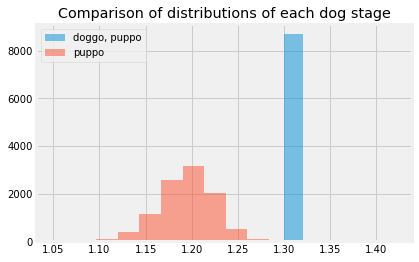

In [91]:
plt.hist(doggo_puppo,alpha=0.5,label="doggo, puppo",bins=[1.3,1.32,1.34,1.36,1.38,1.40,1.42])
plt.hist(puppo,alpha=0.5,label="puppo")
plt.legend() #The bellow picture suggests that there will be statistically significant difference
plt.title("Comparison of distributions of each dog stage");

In [92]:
np.random.seed(42)
std=pd.Series(diff_mean).std()
null_val=np.random.normal(0,std,size=10000)#distrubution of averages under Ho
diff_sample=top_dog_stages().loc[0,"rating_average"]-top_dog_stages().loc[1,"rating_average"]
(null_val>diff_sample).mean()

0.0015

At the level of significance $\alpha=5\%$ we reject $H_{o}$ since the $p$-value is less than 0.05